1. Number of vaccinations per country per month
2. Numbber of daily vaccinations per month

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
raw = pd.read_csv('data/country_vaccinations.csv')
raw['date'] = pd.to_datetime(raw['date'], format="%d/%m/%Y")
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              8451 non-null   object        
 1   iso_code                             8451 non-null   object        
 2   date                                 8451 non-null   datetime64[ns]
 3   total_vaccinations                   5231 non-null   float64       
 4   people_vaccinated                    4688 non-null   float64       
 5   people_fully_vaccinated              3186 non-null   float64       
 6   daily_vaccinations_raw               4415 non-null   float64       
 7   daily_vaccinations                   8260 non-null   float64       
 8   total_vaccinations_per_hundred       5231 non-null   float64       
 9   people_vaccinated_per_hundred        4688 non-null   float64       
 10  people_fully

In [83]:
'''
    Which country has vaccinated the most people and what vaccine/s have they used? 
    (for this will have to use the latest date of each country)
    columns: country, people_vaccinated_per_hundred,daily_vaccinations_per_million, vaccines
'''
raw2 = raw[['country','date','people_vaccinated_per_hundred','daily_vaccinations_per_million','vaccines']]
raw2

,country,date,people_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,2021-02-22,0.00,NaN,Oxford/AstraZeneca
1,Afghanistan,2021-02-23,NaN,35.0,Oxford/AstraZeneca
2,Afghanistan,2021-02-24,NaN,35.0,Oxford/AstraZeneca
3,Afghanistan,2021-02-25,NaN,35.0,Oxford/AstraZeneca
4,Afghanistan,2021-02-26,NaN,35.0,Oxford/AstraZeneca
...,...,...,...,...,...
8446,Zimbabwe,2021-03-23,0.30,44.0,Sinopharm/Beijing
8447,Zimbabwe,2021-03-24,0.33,94.0,Sinopharm/Beijing
8448,Zimbabwe,2021-03-25,0.37,143.0,Sinopharm/Beijing
8449,Zimbabwe,2021-03-26,0.41,187.0,Sinopharm/Beijing


In [84]:
raw2.loc[8000,'date'].month

2

In [85]:
raw2['year'] = raw2.date.dt.year

<ipython-input-85-43eafd580241>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw2['year'] = raw2.date.dt.year


In [86]:
raw2['month'] = raw2.date.dt.month
raw2

<ipython-input-86-90b11b791e04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw2['month'] = raw2.date.dt.month


,country,date,people_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,year,month
0,Afghanistan,2021-02-22,0.00,NaN,Oxford/AstraZeneca,2021,2
1,Afghanistan,2021-02-23,NaN,35.0,Oxford/AstraZeneca,2021,2
2,Afghanistan,2021-02-24,NaN,35.0,Oxford/AstraZeneca,2021,2
3,Afghanistan,2021-02-25,NaN,35.0,Oxford/AstraZeneca,2021,2
4,Afghanistan,2021-02-26,NaN,35.0,Oxford/AstraZeneca,2021,2
...,...,...,...,...,...,...,...
8446,Zimbabwe,2021-03-23,0.30,44.0,Sinopharm/Beijing,2021,3
8447,Zimbabwe,2021-03-24,0.33,94.0,Sinopharm/Beijing,2021,3
8448,Zimbabwe,2021-03-25,0.37,143.0,Sinopharm/Beijing,2021,3
8449,Zimbabwe,2021-03-26,0.41,187.0,Sinopharm/Beijing,2021,3


In [97]:
raw2.to_csv('data/test2.csv')

In [103]:
most_ppl_vaccinated = pd.pivot_table(raw2, index=['country','year','month'], 
                                     values=['people_vaccinated_per_hundred','daily_vaccinations_per_million'],
                                     aggfunc="sum" )
most_ppl_vaccinated.head(10)

daily_vaccinations_per_million  \
country     year month                                   
Afghanistan 2021 2                               210.0   
                 3                              1067.0   
Albania     2021 1                               257.0   
                 2                              3300.0   
                 3                             15610.0   
Algeria     2021 1                                44.0   
                 2                              1524.0   
Andorra     2021 1                              5124.0   
                 2                             22131.0   
                 3                             76554.0   

                        people_vaccinated_per_hundred  
country     year month                                 
Afghanistan 2021 2                               0.02  
                 3                               0.14  
Albania     2021 1                               0.13  
                 2                               0.37  
                 3                               0.00  
Algeria     2021 1                               0.00  
                 2                               0.00  
Andorra     2021 1                               0.75  
                 2                              10.97  
                 3                              17.07

In [100]:
most_ppl_vaccinated.index

MultiIndex([('Afghanistan', 2021,  2),
            ('Afghanistan', 2021,  3),
            (    'Albania', 2021,  1),
            (    'Albania', 2021,  2),
            (    'Albania', 2021,  3),
            (    'Algeria', 2021,  1),
            (    'Algeria', 2021,  2),
            (    'Andorra', 2021,  1),
            (    'Andorra', 2021,  2),
            (    'Andorra', 2021,  3),
            ...
            (    'Uruguay', 2021,  3),
            (  'Venezuela', 2021,  2),
            (  'Venezuela', 2021,  3),
            (    'Vietnam', 2021,  3),
            (      'Wales', 2020, 12),
            (      'Wales', 2021,  1),
            (      'Wales', 2021,  2),
            (      'Wales', 2021,  3),
            (   'Zimbabwe', 2021,  2),
            (   'Zimbabwe', 2021,  3)],
           names=['country', 'year', 'month'], length=410)

In [104]:
most_ppl_vaccinated2 = pd.pivot_table(raw2, index=['country','date'], 
                                     values=['people_vaccinated_per_hundred','daily_vaccinations_per_million'],
                                     aggfunc="sum" )
most_ppl_vaccinated2.head(10)

daily_vaccinations_per_million  \
country     date                                         
Afghanistan 2021-02-22                             0.0   
            2021-02-23                            35.0   
            2021-02-24                            35.0   
            2021-02-25                            35.0   
            2021-02-26                            35.0   
            2021-02-27                            35.0   
            2021-02-28                            35.0   
            2021-03-01                            41.0   
            2021-03-02                            46.0   
            2021-03-03                            52.0   

                        people_vaccinated_per_hundred  
country     date                                       
Afghanistan 2021-02-22                           0.00  
            2021-02-23                           0.00  
            2021-02-24                           0.00  
            2021-02-25                           0.00  
            2021-02-26                           0.00  
            2021-02-27                           0.00  
            2021-02-28                           0.02  
            2021-03-01                           0.00  
            2021-03-02                           0.00  
            2021-03-03                           0.00

# daily_vaccinations_per_million

In [131]:
most_ppl_vaccinated3 = pd.pivot_table(raw2, index=['country'], 
                                     values=['daily_vaccinations_per_million'],
                                     aggfunc="sum").sort_values('daily_vaccinations_per_million', ascending=False).head(10)
most_ppl_vaccinated3

,daily_vaccinations_per_million
country,
Gibraltar,1708325.0
Israel,1145692.0
Seychelles,960657.0
United Arab Emirates,694378.0
Cayman Islands,642302.0
Falkland Islands,633078.0
Bermuda,537087.0
Wales,530781.0
Saint Helena,494160.0


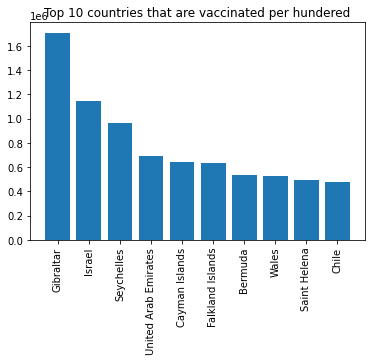

In [142]:
x = most_ppl_vaccinated3.index
y = most_ppl_vaccinated3.daily_vaccinations_per_million

plt.title("Top 10 countries that are vaccinated per hundered")
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [149]:
country_vaccines = raw2[['country','vaccines']]

In [150]:
#country_vaccines.set_index('country', inplace=True)

In [162]:
country_vaccines =country_vaccines.groupby('country')['vaccines'].agg(['unique'])

In [163]:
country_vaccines

,unique
country,
Afghanistan,[Oxford/AstraZeneca]
Albania,[Pfizer/BioNTech]
Algeria,[Sputnik V]
Andorra,[Pfizer/BioNTech]
Angola,[Oxford/AstraZeneca]
...,...
Uruguay,"[Pfizer/BioNTech, Sinovac]"
Venezuela,[Sputnik V]
Vietnam,[Oxford/AstraZeneca]


In [165]:
country_vaccines.loc['Gibraltar']

unique    [Pfizer/BioNTech]
Name: Gibraltar, dtype: object

In [171]:
most_ppl_vaccinated3_vaccines = most_ppl_vaccinated3.join(country_vaccines)

In [172]:
most_ppl_vaccinated3_vaccines

,daily_vaccinations_per_million,unique
country,,
Gibraltar,1708325.0,[Pfizer/BioNTech]
Israel,1145692.0,"[Moderna, Pfizer/BioNTech]"
Seychelles,960657.0,"[Oxford/AstraZeneca, Sinopharm/Beijing]"
United Arab Emirates,694378.0,"[Oxford/AstraZeneca, Pfizer/BioNTech, Sinophar..."
Cayman Islands,642302.0,[Pfizer/BioNTech]
Falkland Islands,633078.0,[Oxford/AstraZeneca]
Bermuda,537087.0,[Pfizer/BioNTech]
Wales,530781.0,"[Oxford/AstraZeneca, Pfizer/BioNTech]"
Saint Helena,494160.0,[Oxford/AstraZeneca]


In [62]:
# country and people vaccinated
df_ppl_vaccinated = raw.groupby('country').sum().sort_values('people_vaccinated', ascending=False).head(10)
df_ppl_vaccinated

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
country,,,,,,,,,
United States,4.688823e+09,3.230393e+09,1.438561e+09,127611877.0,131254459.0,1401.98,965.96,430.11,392459.0
United Kingdom,1.264418e+09,1.192898e+09,7.151943e+07,30340566.0,31472156.0,1862.54,1757.21,105.35,463601.0
England,1.070005e+09,1.014318e+09,5.568636e+07,25427960.0,26497822.0,1900.97,1802.05,98.95,470762.0
India,1.182276e+09,1.011405e+09,1.708709e+08,59805465.0,53535354.0,85.67,73.27,12.37,38791.0
Brazil,4.361986e+08,3.523468e+08,8.371696e+07,16539026.0,15725236.0,205.21,165.79,39.38,73982.0
Israel,5.246038e+08,3.198474e+08,2.047564e+08,9927522.0,9916590.0,6060.89,3695.27,2365.66,1145692.0
Turkey,4.658518e+08,2.987360e+08,1.173784e+08,14652659.0,14628019.0,552.36,354.19,139.15,173446.0
Germany,4.040663e+08,2.832456e+08,1.208207e+08,12339728.0,11583058.0,482.27,338.07,144.20,138250.0
Italy,3.036643e+08,2.092560e+08,9.440834e+07,9203743.0,8550798.0,502.25,346.08,156.14,141420.0


# Which country has fully vaccinated the most people?

In [191]:
df_fully_vaccinated = pd.pivot_table(raw, index=['country'], 
                                     values=['people_fully_vaccinated_per_hundred'],
                                     aggfunc="sum").sort_values('people_fully_vaccinated_per_hundred', ascending=False).head(10)

df_fully_vaccinated

,people_fully_vaccinated_per_hundred
country,
Israel,2365.66
Gibraltar,2223.00
Seychelles,521.60
United States,430.11
Malta,334.54
Serbia,315.63
Isle of Man,310.31
Bahrain,288.00
Chile,266.68


<function matplotlib.pyplot.show(close=None, block=None)>

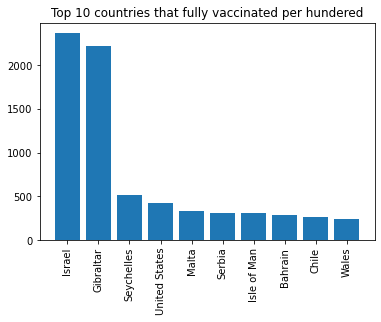

In [190]:
plt.title("Top 10 countries that fully vaccinated per hundered")
plt.bar(df_fully_vaccinated.index, df_fully_vaccinated.people_fully_vaccinated_per_hundred)
plt.xticks(rotation=90)

plt.show

# The most vaccines administered on a day, what date, who by and how many?

The most vaccines administered on a day, what date, who by and how many?

Which country has administer at least one dose to the largest percentage of their population?
 
I think I will need some patterns so something like top 10 and bottom 10 for total vaccinations and percentage of population vaccinated etc. then can see if its countries with small or large populations, if they are from similar continents or geographical areas. May be no pattern which would be interesting.
 
Some hypothesis for the introduction and to test with visualizations I have come up with the following:
America has administer the most doses
The daily number of vaccinations per country has increased greater than linearly since day 1 of vaccine administration
The number of people fully vaccinated lags 3 weeks behind the vaccinated numbers due to wait between first and second dose
Smaller populations have vaccinated a higher percentage of their population
The two most well known vaccines (Oxford and Pfizer) will be the most popular
 
I'm at a bit of a standstill with the report until some of that information comes through. I will struggle to find time to work on it after Thursday so if anyone has the time to get that to me as soon as possible that would be great.

In [ ]:
raw.loc[]


<function matplotlib.pyplot.show(close=None, block=None)>

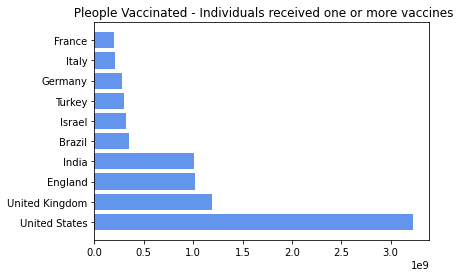

In [63]:
plt.title(" Pleople Vaccinated - Individuals received one or more vaccines")
plt.barh(df_ppl_vaccinated.index, df_ppl_vaccinated.people_vaccinated, color='cornflowerblue')

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

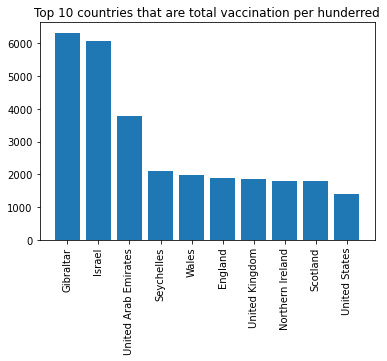

In [135]:
# country & total vaccination per hundered
df_total_vac_per_hundred = raw.groupby('country').sum().sort_values('total_vaccinations_per_hundred', ascending=False).head(10)

plt.title("Top 10 countries that are total vaccination per hunderred")
plt.bar(df_total_vac_per_hundred.index, df_total_vac_per_hundred.total_vaccinations_per_hundred)
plt.xticks(rotation=90)

plt.show

In [65]:
# country & vaccinaton per day per million 